In [27]:
!pip install yellowbrick
!pip install statsmodels
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv("BostonHousing.csv")
df

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.describe()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crime_rate  506 non-null    float64
 1   zn          506 non-null    float64
 2   indus       506 non-null    float64
 3   chas        506 non-null    int64  
 4   nox         506 non-null    float64
 5   rm          501 non-null    float64
 6   Age         506 non-null    float64
 7   Distance    506 non-null    float64
 8   rad         506 non-null    int64  
 9   tax         506 non-null    int64  
 10  ptratio     506 non-null    float64
 11  b           506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [7]:
df.dropna(inplace=True)

<AxesSubplot:>

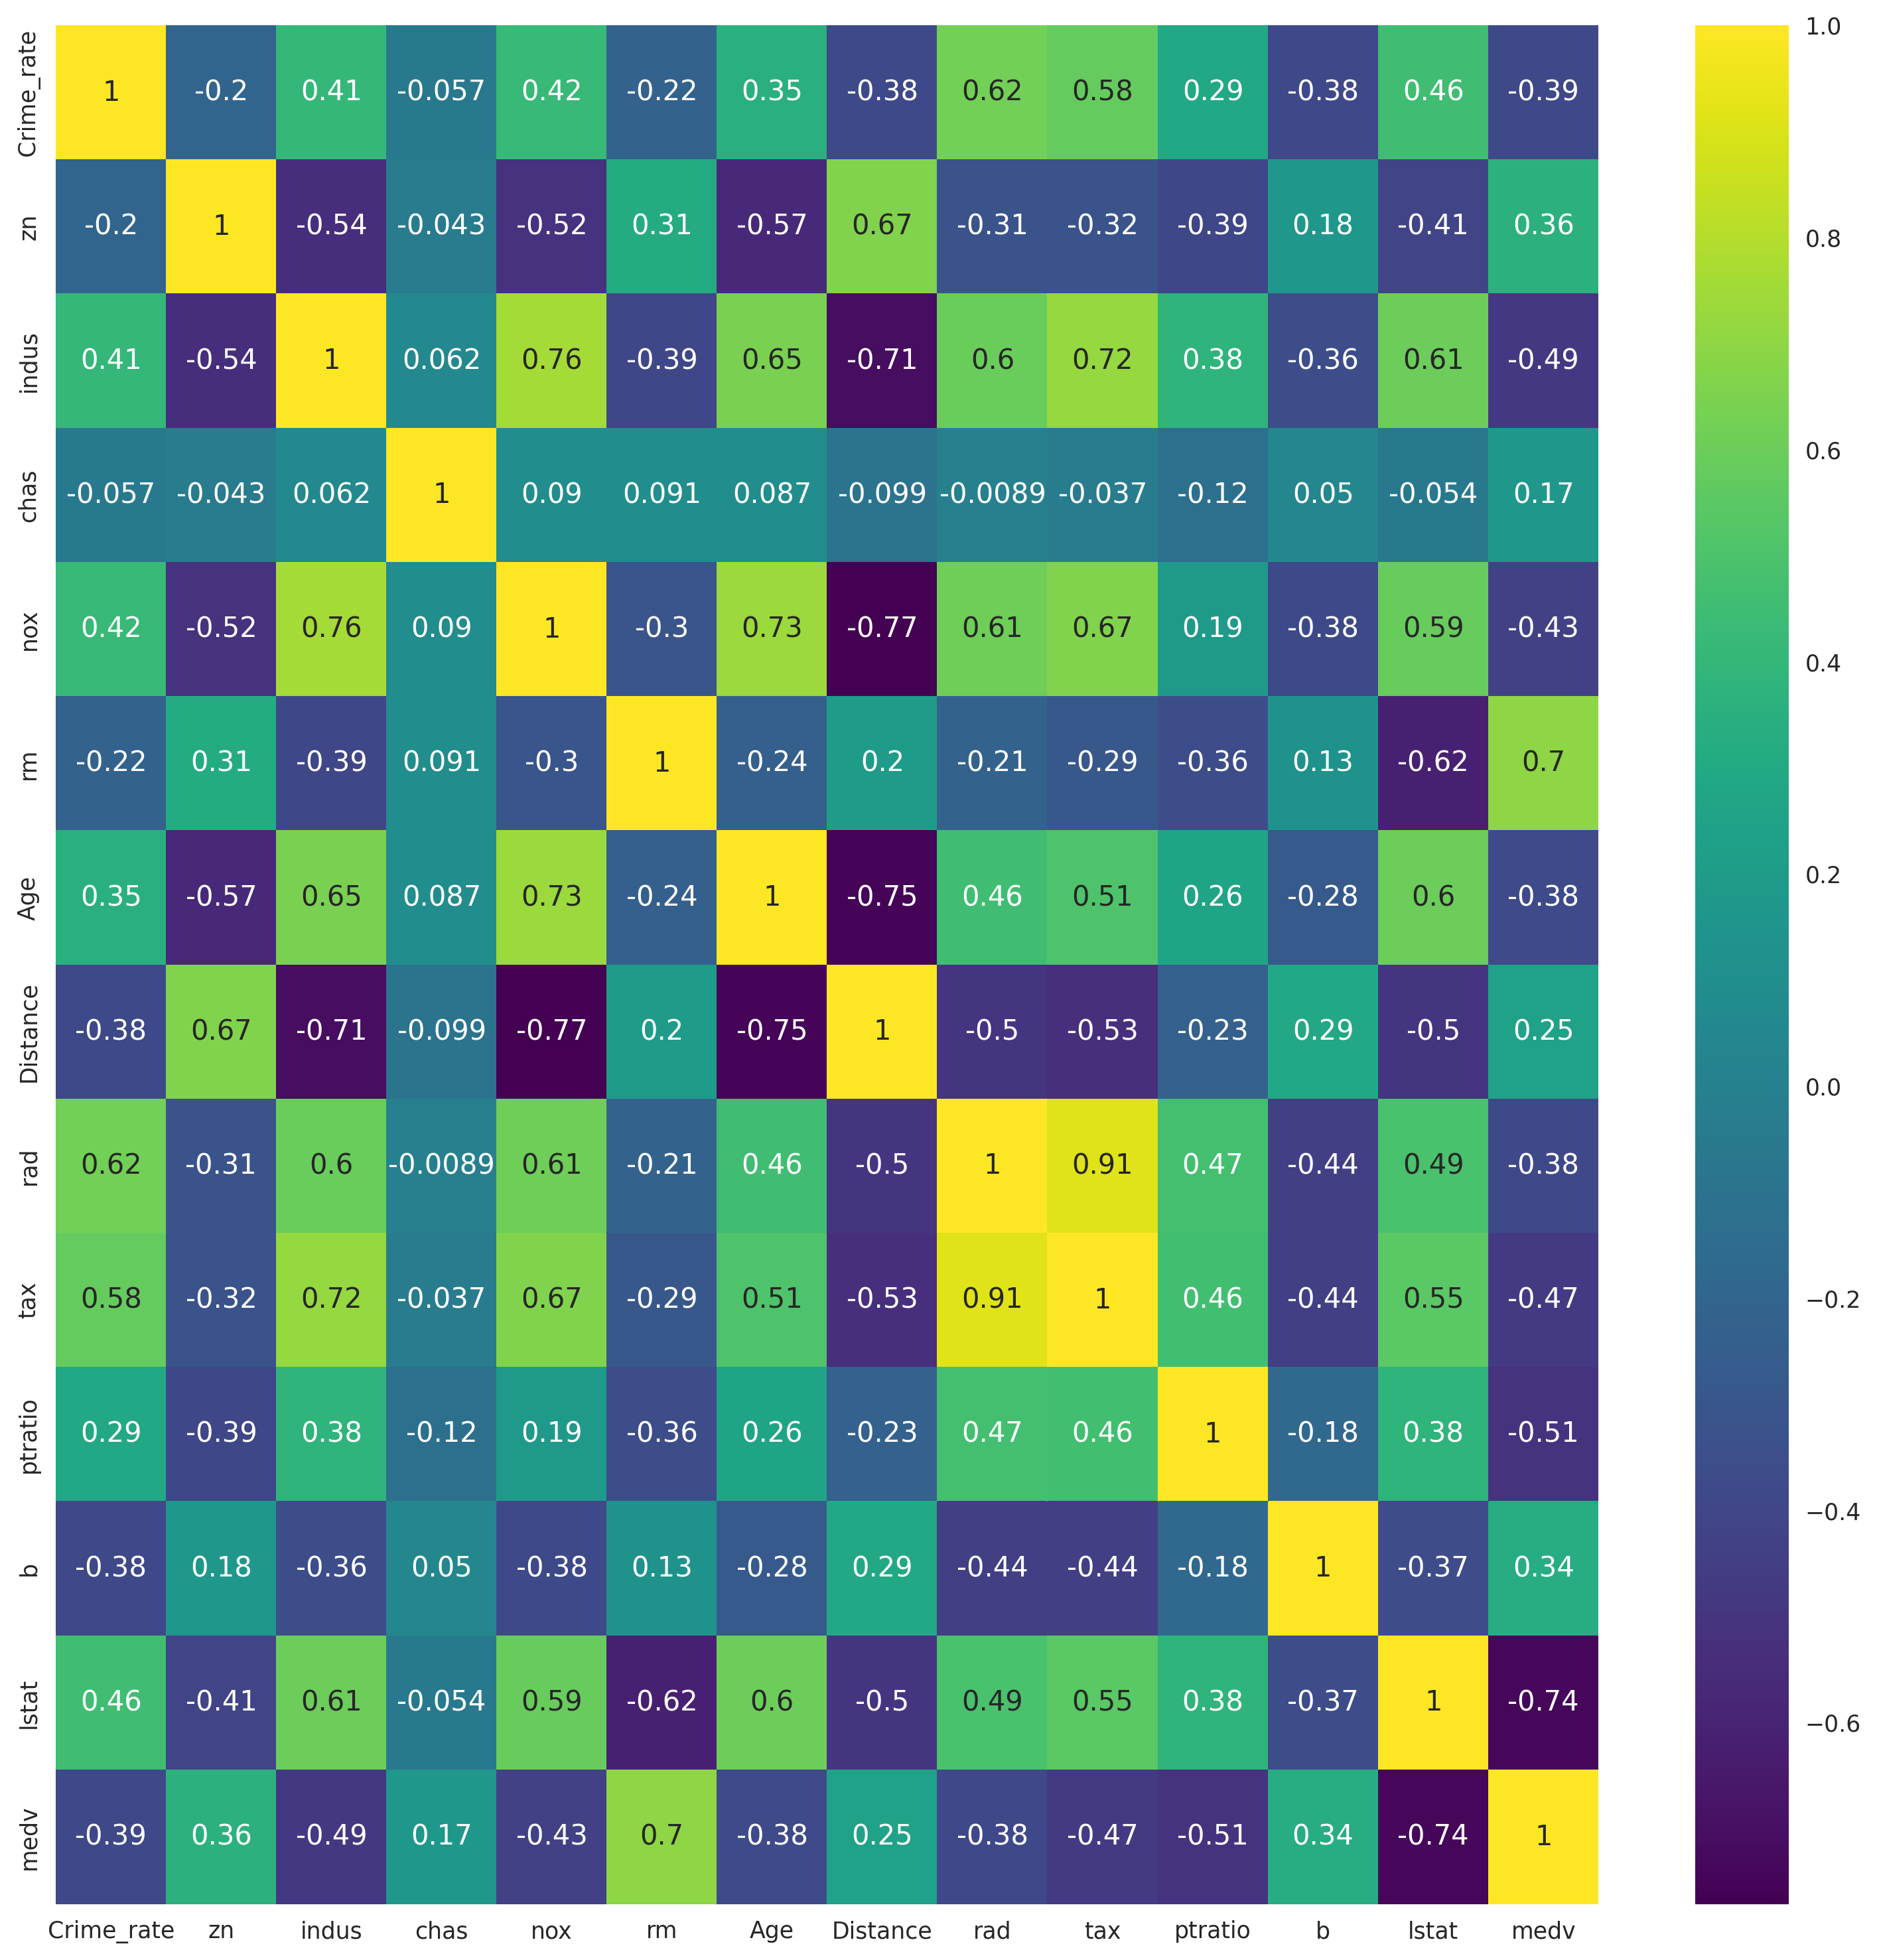

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:>

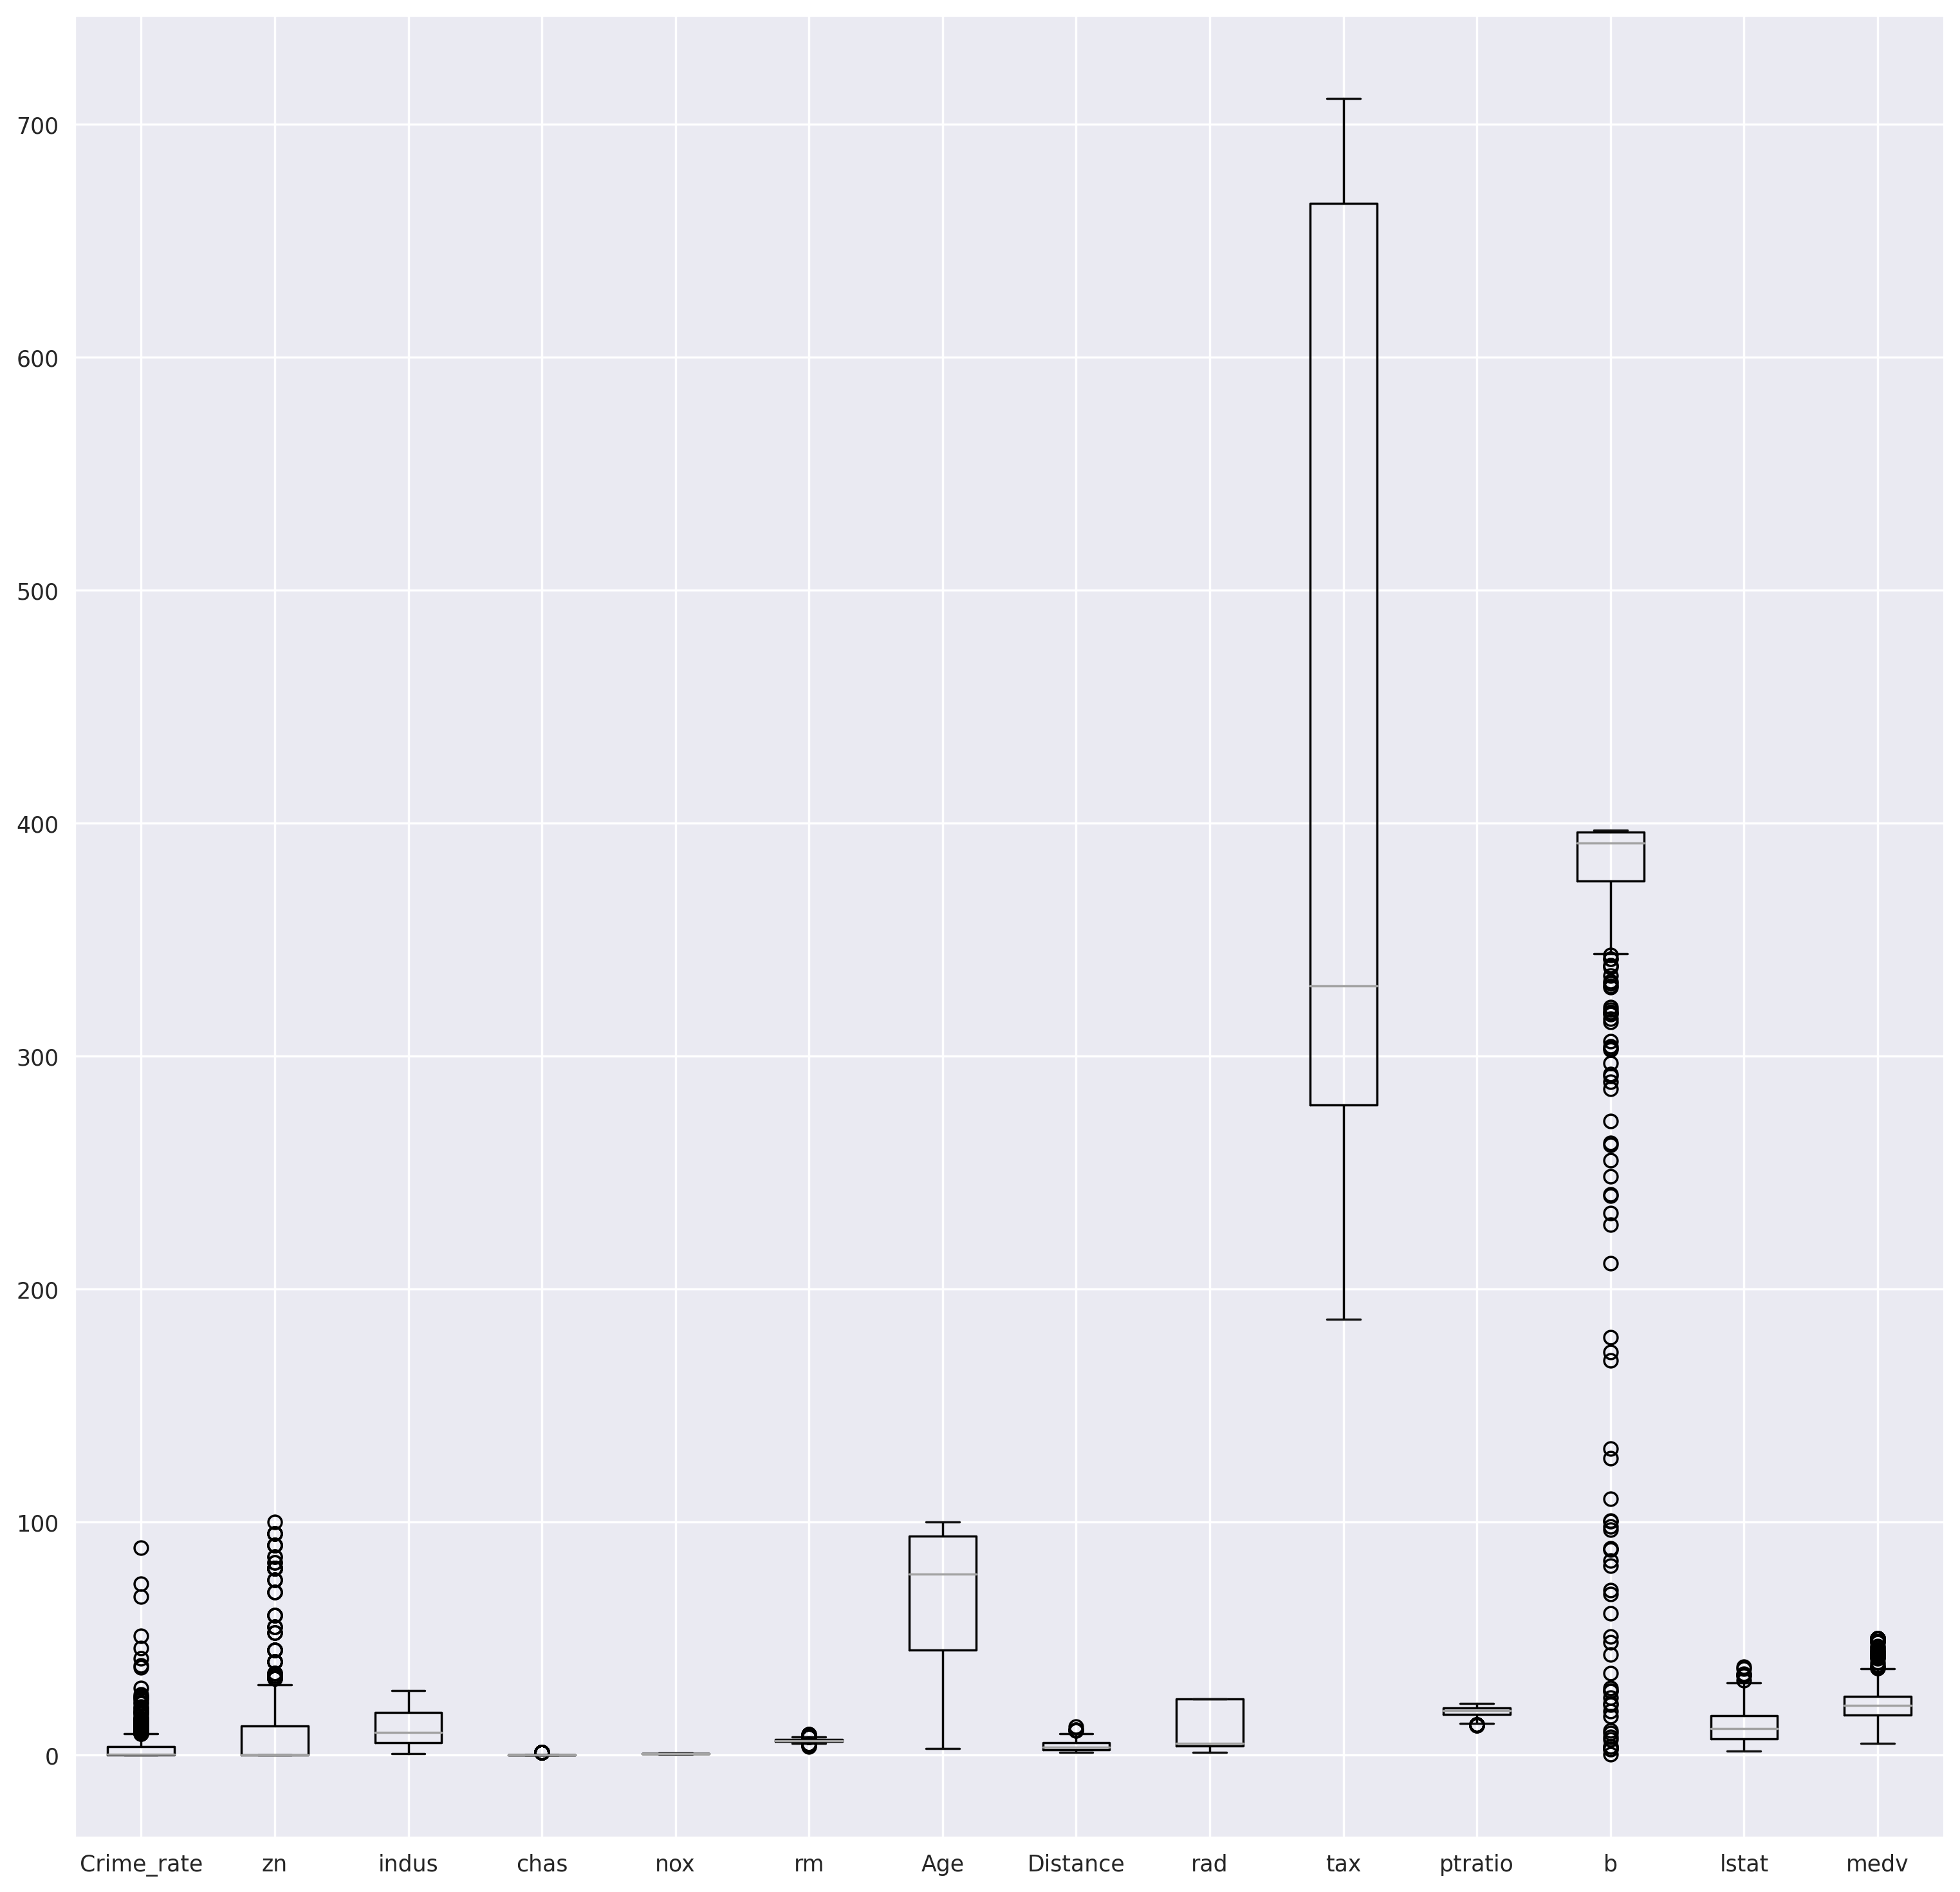

In [9]:
df.boxplot()

In [10]:
outliers={}

for col in df.select_dtypes(include=['number']).columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    outliers[col]=df[(df[col]<lower) | (df[col]>upper)]

for col,outlier_data in outliers.items():
    print(f"{col} outliers ")
    print(outlier_data.shape[0])


Crime_rate outliers 
66
zn outliers 
68
indus outliers 
0
chas outliers 
35
nox outliers 
0
rm outliers 
30
Age outliers 
0
Distance outliers 
5
rad outliers 
0
tax outliers 
0
ptratio outliers 
15
b outliers 
76
lstat outliers 
7
medv outliers 
37


In [11]:
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        data[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))

    return data


In [12]:
df = capping(df, ['Crime_rate', 'medv', 'lstat', 'b', 'ptratio', 'Distance', 'rm', 'zn', 'chas'])
X = df.iloc[:, :-1]
y = df['medv']


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.isnull().sum()
X_scaled.fillna(0, inplace=True)

In [14]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))


       Feature        VIF
8          rad  12.468293
0   Crime_rate   9.283528
9          tax   8.583538
4          nox   4.468306
7     Distance   4.153986
2        indus   3.984972
12       lstat   3.252566
6          Age   3.115845
1           zn   2.426542
5           rm   2.044353
10     ptratio   1.886863
11           b   1.344789
3         chas        NaN


In [15]:
X = X_scaled
xtrain, xtest, ytrain, ytest = train_test_split(X ,y, random_state = 42, test_size = 0.3)
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error for X1: {mse:.4f}")
print(f"R² Score for X1: {r2:.4f}")


Mean Squared Error for X1: 12.0092
R² Score for X1: 0.7895


In [16]:
X1 = X_scaled.drop(columns=['rad'])
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, y, random_state=42, test_size=0.3)

lr1 = LinearRegression()
lr1.fit(xtrain1, ytrain1)
ypred1 = lr1.predict(xtest1)

mse1 = mean_squared_error(ytest1, ypred1)
r2_1 = r2_score(ytest1, ypred1)

print(f"Mean Squared Error for X1: {mse1:.4f}")
print(f"R² Score for X1: {r2_1:.4f}")


Mean Squared Error for X1: 12.8448
R² Score for X1: 0.7748


In [17]:
X2 = X_scaled.drop(columns=['Crime_rate'])
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y, random_state=42, test_size=0.3)

lr2 = LinearRegression()
lr2.fit(xtrain2, ytrain2)
ypred2 = lr2.predict(xtest2)

mse2 = mean_squared_error(ytest2, ypred2)
r2_2 = r2_score(ytest2, ypred2)

print(f"Mean Squared Error for X2: {mse2:.4f}")
print(f"R² Score for X2: {r2_2:.4f}")


Mean Squared Error for X2: 12.5671
R² Score for X2: 0.7797


In [18]:
X_1=X_scaled.drop(columns=['Crime_rate','rad'])
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X_1, y, random_state=42, test_size=0.3)
model = LinearRegression()
model.fit(xtrain1, ytrain1)
ypred = model.predict(xtest1)
mse = mean_squared_error(ytest1, ypred)
r2 = r2_score(ytest1, ypred)
print(f"Mean Squared Error for X1: {mse}")
print(f"R² Score for X1: {r2}")

Mean Squared Error for X1: 12.838618683334444
R² Score for X1: 0.7749233918664928


In [29]:
X = X_scaled
xtrain, xtest, ytrain, ytest = train_test_split(X ,y, random_state = 42, test_size = 0.3)
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error for X1: {mse:.4f}")
print(f"R² Score for X1: {r2:.4f}")


Mean Squared Error for X1: 12.0092
R² Score for X1: 0.7895


In [30]:
lr.coef_

array([-2.10530638e+00,  4.85398265e-01,  2.33552729e-01, -5.55111512e-16,
       -1.27794382e+00,  1.87171393e+00,  3.29475895e-02, -1.98878479e+00,
        3.04741173e+00, -1.70418177e+00, -1.64452510e+00,  4.31765354e-01,
       -3.75322677e+00])

In [77]:
#R Square
def r_square(y_test, y_pred):
    ssres = 0
    sstotal = 0
    y_mean = np.mean(y_test)
    print(y_mean)
    for i in range(len(y_test)):
        ssres += (y_test.iloc[i] - y_pred.iloc[i])**2  # Residual sum of squares
        sstotal += (y_test.iloc[i] - y_mean)**2 
    d = ssres/sstotal
    return (1 - d)

In [79]:
print(r_square(ytest, ypred))

21.509271523178807


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

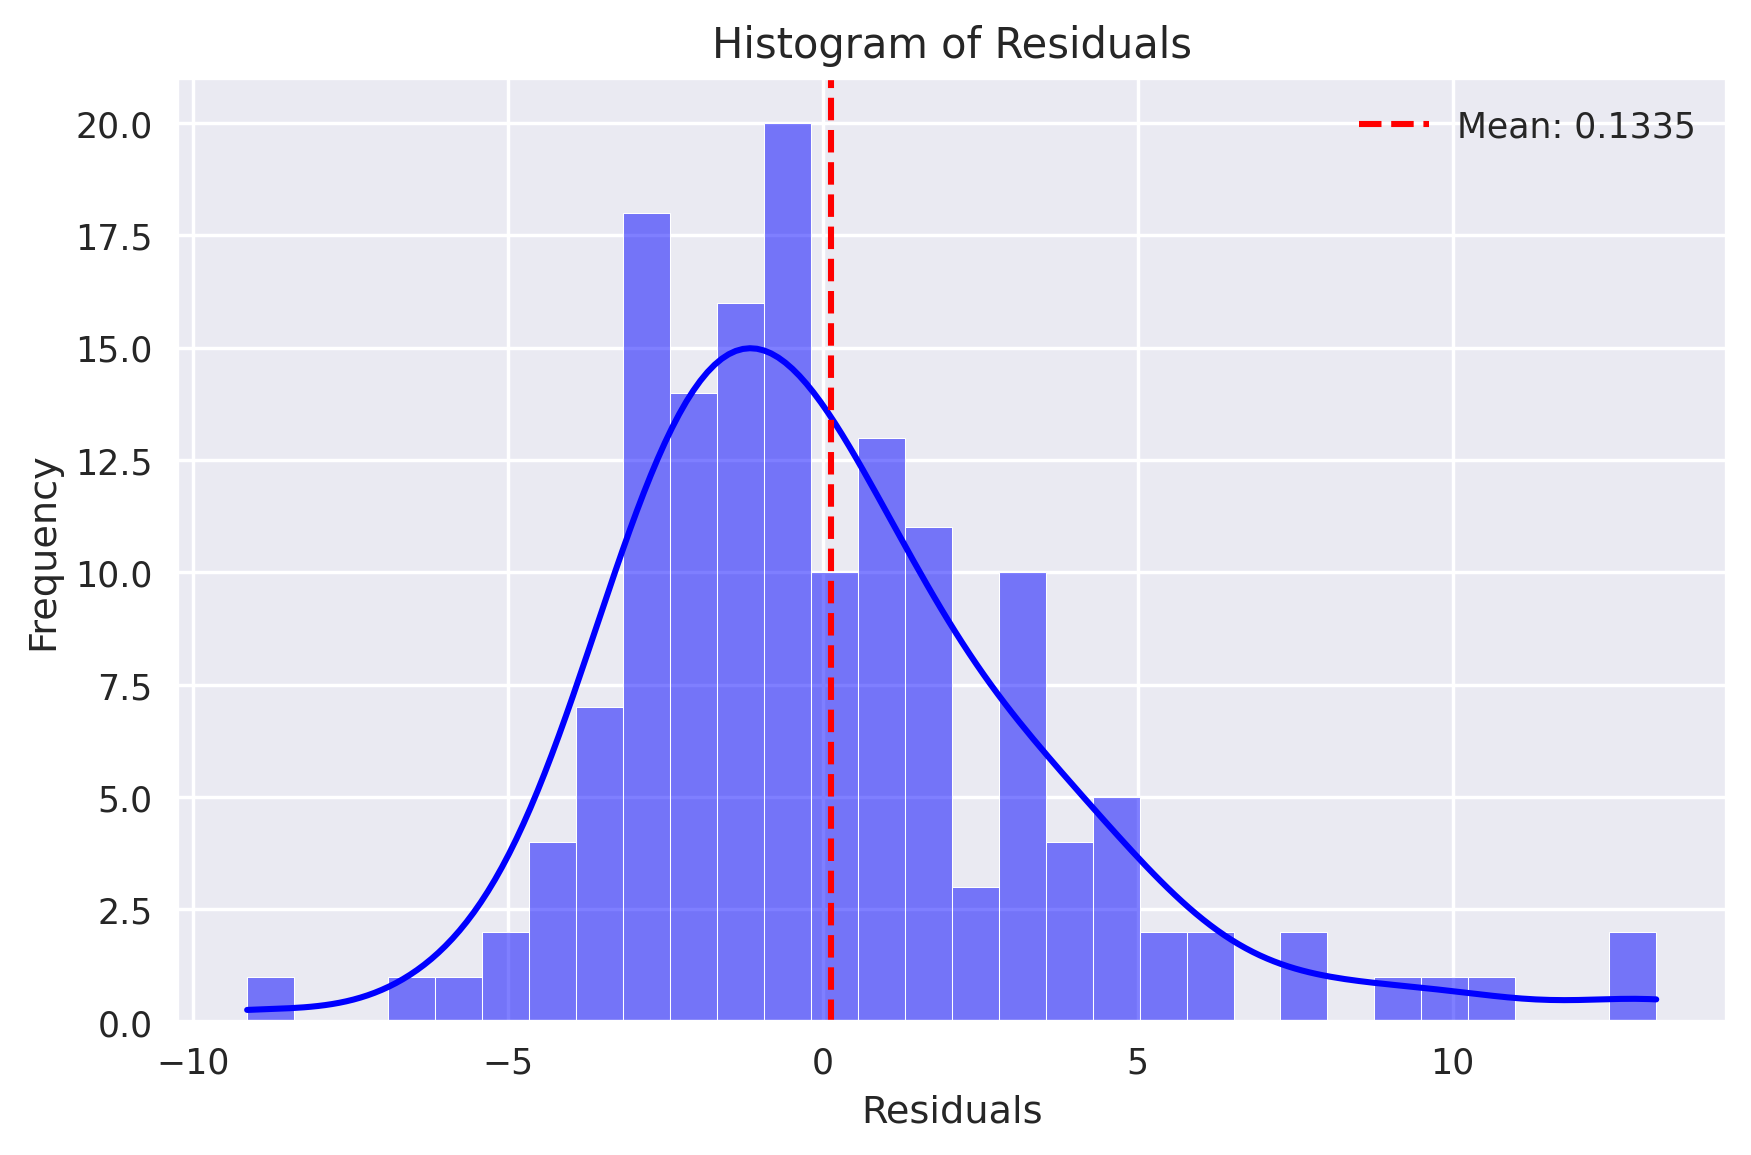

In [20]:

errors = ytest - ypred

plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color='blue')
plt.axvline(errors.mean(), color='red', linestyle='dashed', label=f"Mean: {errors.mean():.4f}")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()


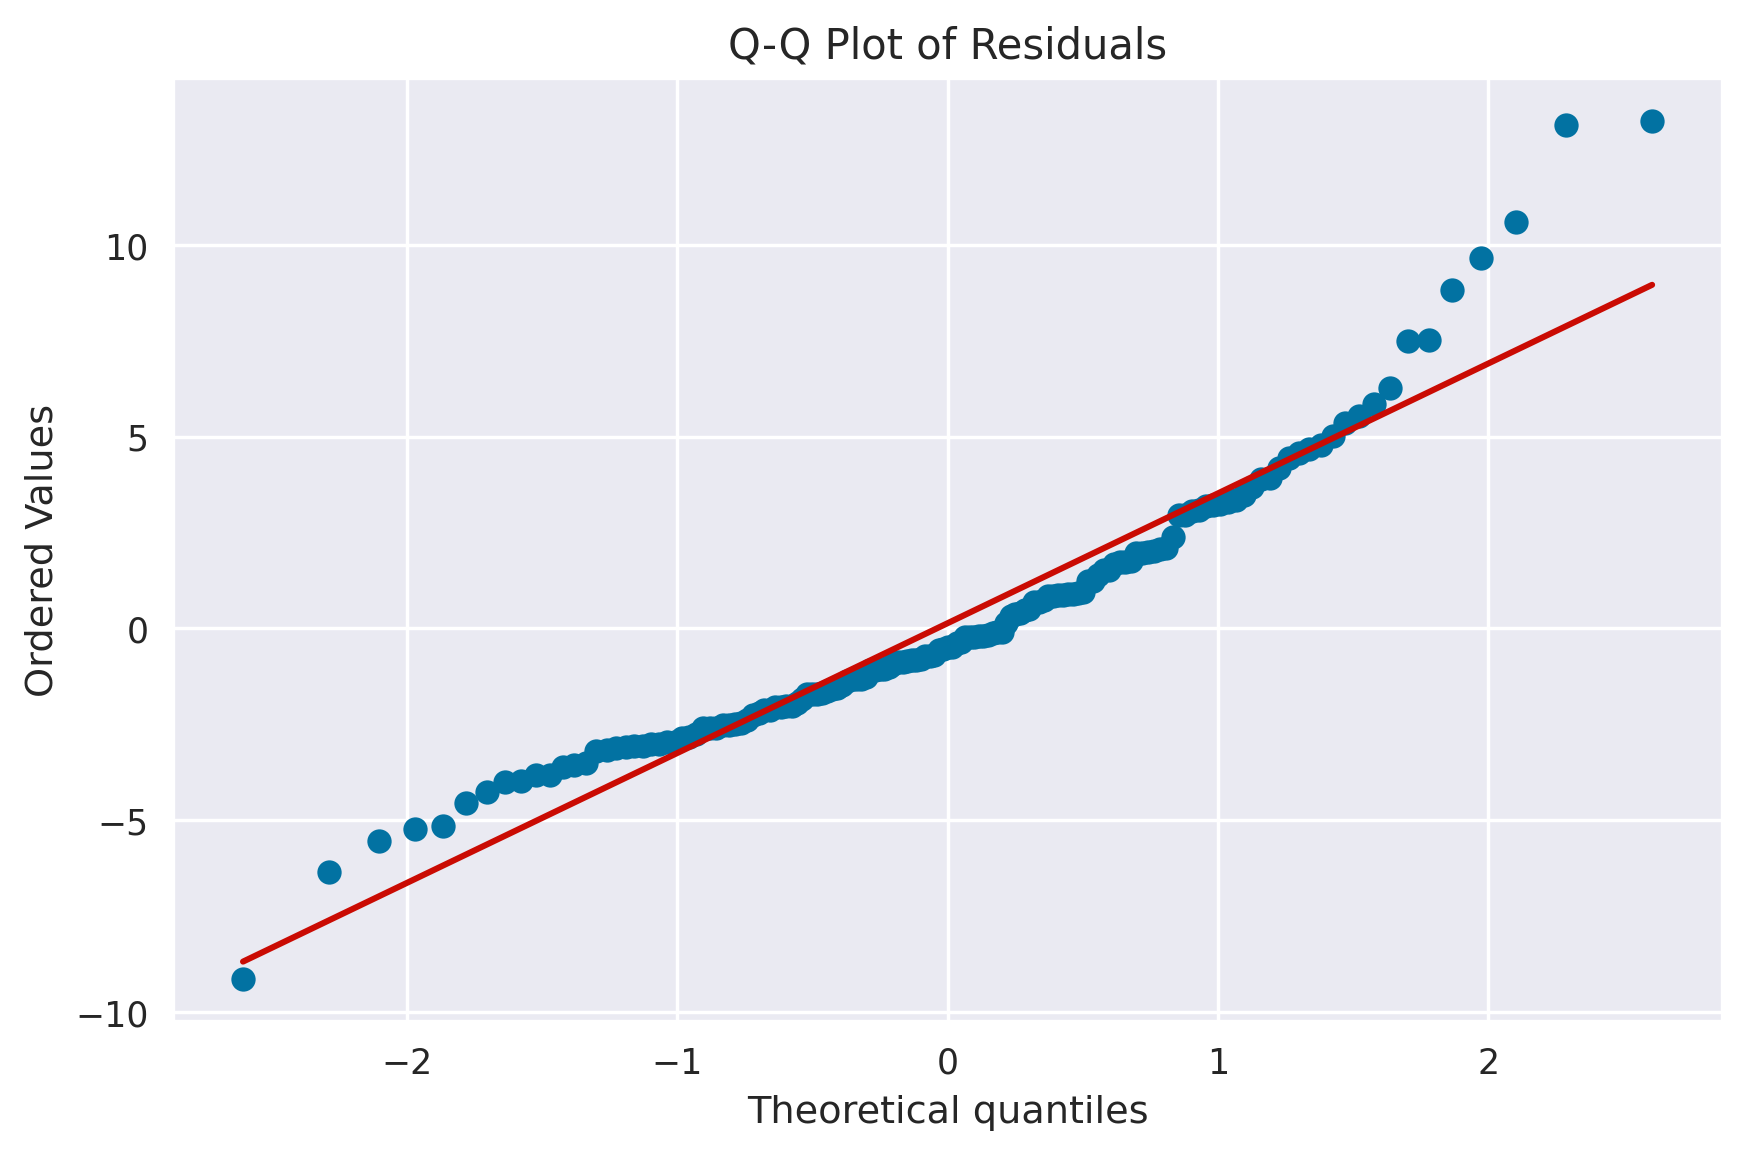

In [21]:
import scipy.stats as stats

plt.figure(figsize=(8, 5))
stats.probplot(errors, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


AttributeError: 'LinearRegression' object has no attribute 'coef'